<a href="https://colab.research.google.com/github/lovepreetmultani/Anti-Money-Laundering/blob/main/ML_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [3]:
fraud=pd.read_csv("drive/My Drive/Dissertation/final_processed_data.csv")

In [61]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tx_fraud           10007 non-null  int64  
 1   tx_amount          10007 non-null  float64
 2   s_pagerank         10007 non-null  float64
 3   s_label            10007 non-null  int64  
 4   s_min_send_tx      10007 non-null  float64
 5   s_min_receieve_tx  10007 non-null  float64
 6   s_max_send_tx      10007 non-null  float64
 7   s_max_recieve_tx   10007 non-null  float64
 8   s_avg_send_tx      10007 non-null  float64
 9   s_avg_recieve_tx   10007 non-null  float64
 10  s_cnt_recieve_tx   10007 non-null  int64  
 11  s_cnt_send_tx      10007 non-null  int64  
 12  r_pagerank         10007 non-null  float64
 13  r_label            10007 non-null  int64  
 14  r_min_send_tx      10007 non-null  float64
 15  r_min_receieve_tx  10007 non-null  float64
 16  r_max_send_tx      100

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [5]:
X, y = smote.fit_resample(fraud.drop('tx_fraud', axis=1), fraud['tx_fraud'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras import losses

In [8]:
  model = Sequential()

  model.add(Dense(units = 78, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 39, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 19, activation="relu"))
  model.add(Dropout(0.2))

  model.add(Dense(units = 1,activation="sigmoid")) #Binary classification 0 or 1

  model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [20]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

115/115 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/400
115/115 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 10/400
115/115 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 11/400
115/115 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 12/400
115/115 [==============================] - 0s 3ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 13/400
115/115 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 14/400
115/115 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 15/400
115/115 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 16/400
  1/115 [..............................] - ETA: 0s - loss: 0.6929

KeyboardInterrupt: ignored

In [15]:
losses.plot()

AttributeError: ignored

In [21]:
test_predictions = model.predict(X_test)
test_predictions = np.round(test_predictions)

115/115 [==============================] - 0s 1ms/step


Confusion Matrix:
[[   0 1874]
 [   0 1806]]


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1874
           1       0.49      1.00      0.66      1806

    accuracy                           0.49      3680
   macro avg       0.25      0.50      0.33      3680
weighted avg       0.24      0.49      0.32      3680



Accuracy: 0.4907608695652174


Precision: 0.4907608695652174
Recall: 1.0
f1 score: 1.0
0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


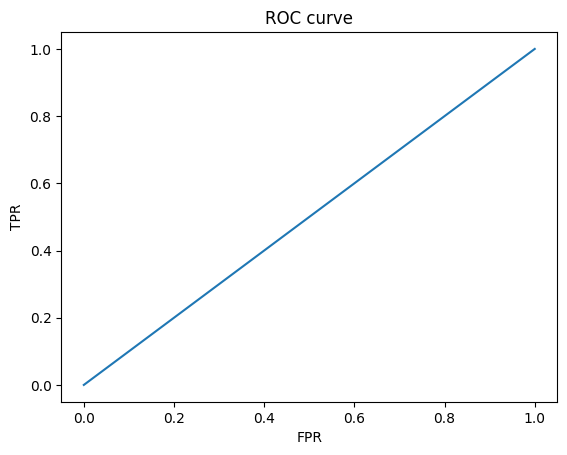

In [19]:
result = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(result)
print('\n')
result1 = classification_report(y_test, test_predictions)
print("Classification Report:",)
print (result1)
print('\n')
result2 = accuracy_score(y_test,test_predictions)
print("Accuracy:",result2)
print('\n')
# calculate precision and recall scores
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1score = f1_score(y_test, test_predictions)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("f1 score:", recall)

print(roc_auc_score(y_test, test_predictions))

fpr, tpr, _ = roc_curve(y_test, test_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [23]:
from sklearn.ensemble import IsolationForest

contamination = 0.01

data = fraud.copy()

In [24]:
for col in data.columns:
    if data[col].dtype == "object":
        le = LabelEncoder()
        data[col].fillna("None",inplace=True)
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))
    else:
        data[col].fillna(-999, inplace=True)

data.head(2)

,tx_fraud,tx_amount,s_pagerank,s_label,s_min_send_tx,s_min_receieve_tx,s_max_send_tx,s_max_recieve_tx,s_avg_send_tx,s_avg_recieve_tx,...,r_min_send_tx,r_min_receieve_tx,r_max_send_tx,r_max_recieve_tx,r_avg_send_tx,r_avg_recieve_tx,r_cnt_recieve_tx,r_cnt_send_tx,year,month
0,1,2661.05,1.64276,52429084,90.98,45.89,2661.05,2956.72,174.60600,314.35879,...,91.04,46.12,109.53,2661.05,99.75712,851.45423,26,52,2017,11
1,1,2661.05,0.89618,37749079,90.19,45.72,2661.05,2956.72,207.55542,437.18238,...,91.04,46.12,109.53,2661.05,99.75712,851.45423,26,52,2017,10


In [25]:
%%time
model = IsolationForest(contamination=contamination,n_estimators=1000)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


CPU times: user 7.16 s, sys: 49 ms, total: 7.21 s
Wall time: 46.6 s


IsolationForest(contamination=0.01, n_estimators=1000)

In [27]:
data["iforest"] = pd.Series(model.predict(data))
data["iforest"] = data["iforest"].map({1:0,-1:1})
print(data["iforest"].value_counts())

0    9906
1     101
Name: iforest, dtype: int64


In [28]:
from xgboost.sklearn import XGBRFClassifier
# model = XGBRFClassifier(n_estimators=20, subsample=0.9, colsample_bynode=0.2)
model = XGBRFClassifier(n_estimators=10)

In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=None)

In [31]:
from sklearn.model_selection import cross_val_score
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [32]:
import numpy as np
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 1.000 (0.000)


In [34]:
v_scores = cross_val_score(model,X_test,y_test,scoring='accuracy', cv=cv,n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(v_scores), np.std(v_scores)))

Mean Accuracy: 1.000 (0.000)


In [41]:
from sklearn.metrics import average_precision_score

In [42]:
# Long computation in this cell (~1.8 minutes)
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(X_train, y_train).predict_proba(X_test)
print('AUPRC = {}'.format(average_precision_score(y_test, \
                                              probabilities[:, 1])))

AUPRC = 1.0


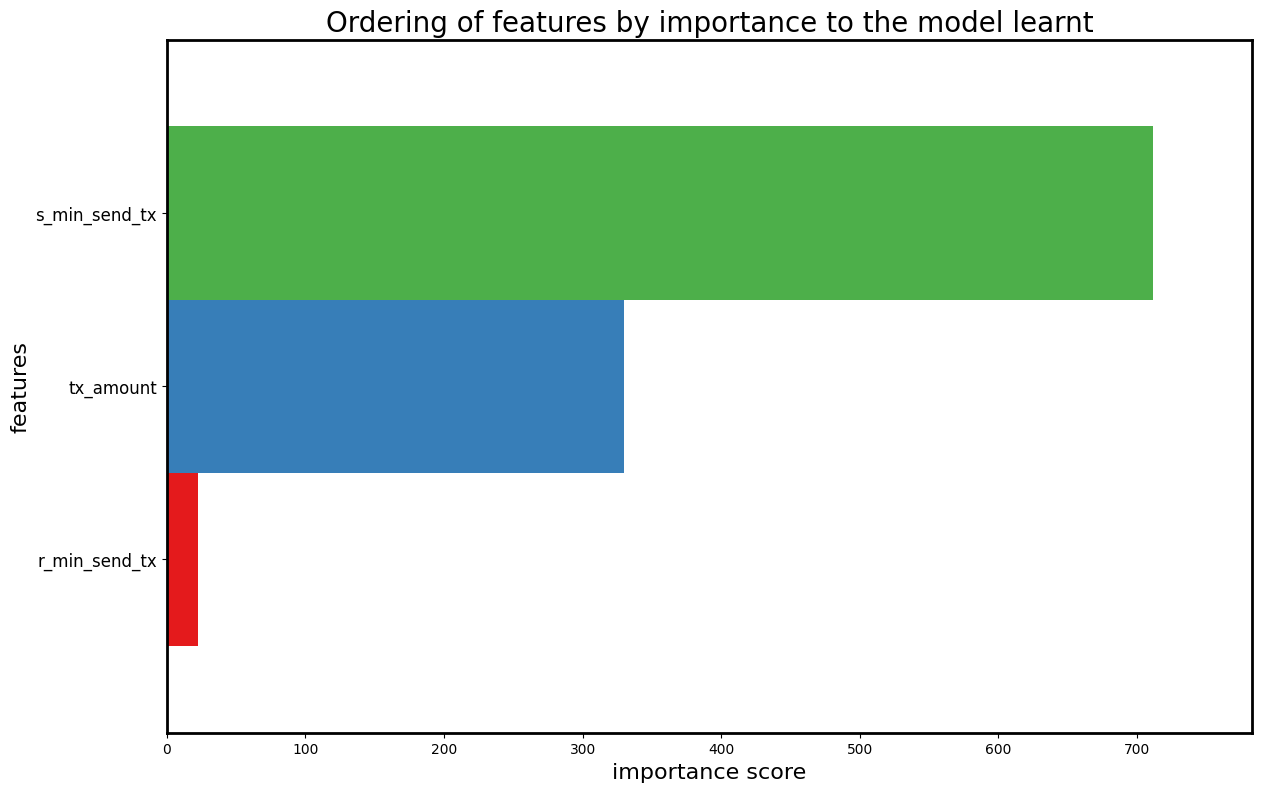

In [43]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

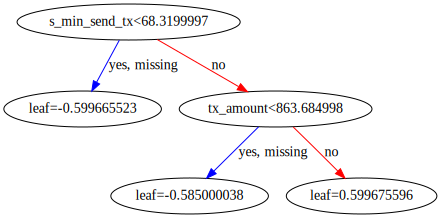

In [44]:
to_graphviz(clf)

In [45]:
from lightgbm import LGBMClassifier

In [ ]:
lgb_cv_model = LGBMClassifier(learning_rate=0.01, max_depth=10, subsample=0.6,
                              n_estimators=1000, min_child_samples=10).fit(X_train, y_train)
y_pred = lgb_cv_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [50]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [51]:
shap_values = shap.TreeExplainer(lgb_cv_model).shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


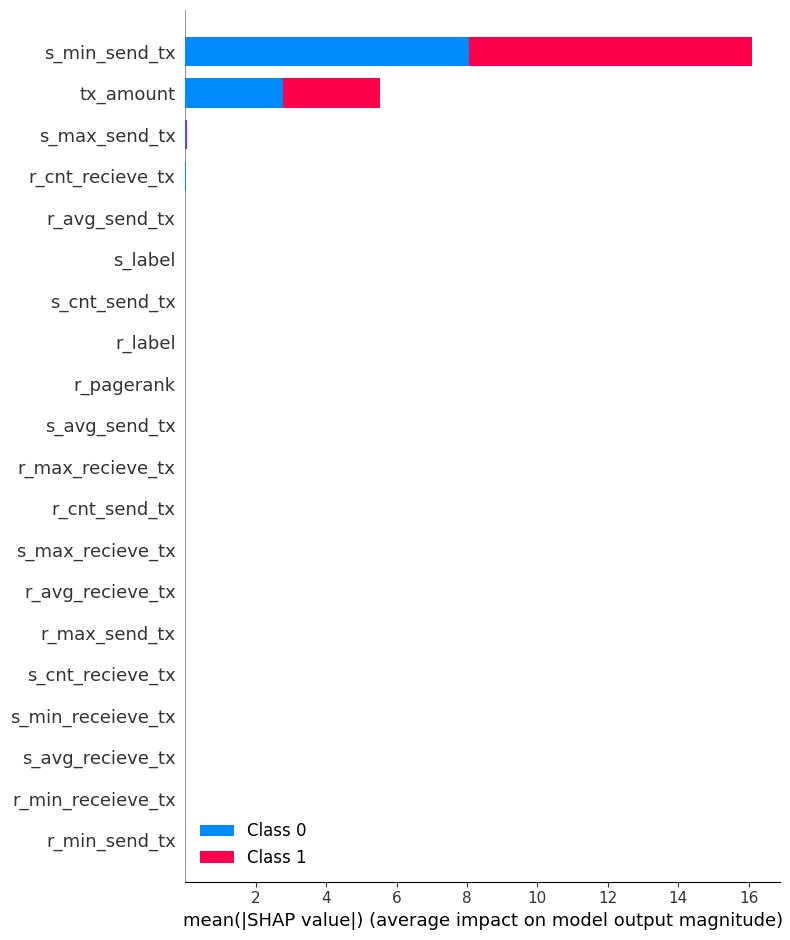

In [52]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [53]:
from shap import Explainer, Explanation

explainer = Explainer(lgb_cv_model)
shap_values = explainer(X_test)
np.shape(shap_values.values)

(3680, 23, 2)

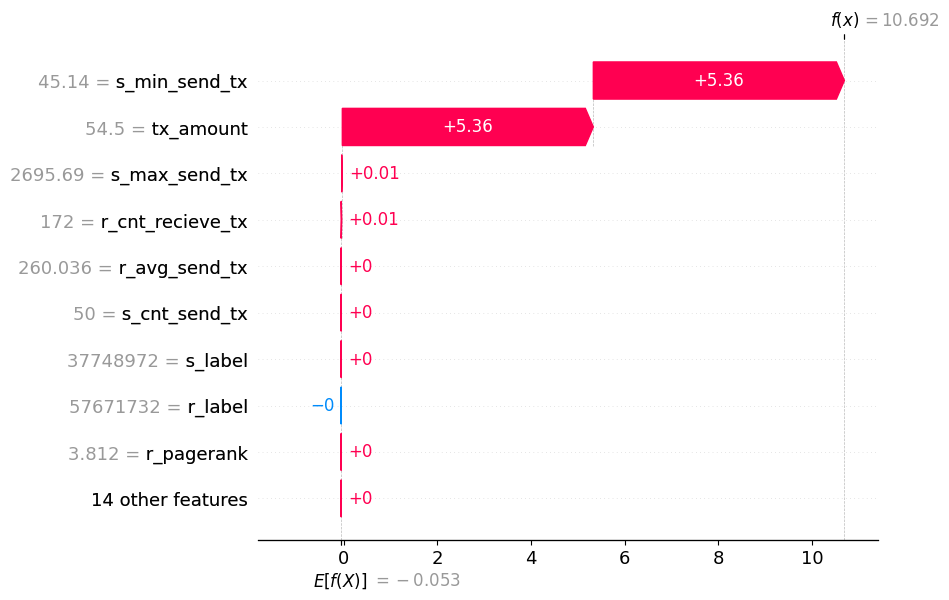

In [54]:
exp = Explanation(shap_values[:,:,0], shap_values.base_values[:,0], X_test, feature_names=X_test.columns)
idx = 1
shap.plots.waterfall(exp[idx])

In [62]:
import os
import torch
import torch.nn.functional as F
from tqdm import tqdm
from torch_geometric.loader import NeighborLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch_geometric.nn import MessagePassing, SAGEConv
from ogb.nodeproppred import Evaluator, PygNodePropPredDataset
import networkx as nx
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [63]:


# Step 1: Data Preparation (Assuming df is your DataFrame)
# For simplicity, taking a subset of the DataFrame
fraud = fraud[['s_label', 'r_label', 's_pagerank', 'r_pagerank', 'tx_fraud']]

# Step 2: Graph Construction
G = nx.from_pandas_edgelist(fraud, 's_label', 'r_label')

# Step 3: Feature Matrix
# Constructing a feature DataFrame indexed by node
node_features = fraud.groupby('s_label').mean()[['s_pagerank']]
feature_matrix = torch.tensor(node_features.values, dtype=torch.float)

# Step 4: Graph Neural Network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(fraud.num_node_features, 16)
        self.conv2 = GCNConv(16, fraud.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create the data object
edge_index = torch.tensor(list(G.edges)).t().contiguous()
data = Data(x=feature_matrix, edge_index=edge_index, y=torch.tensor(fraud['tx_fraud'].values))


In [69]:
G = nx.from_pandas_edgelist(fraud, 's_label', 'r_label')
features_dict = {}

In [70]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [72]:
edge_index = torch.tensor(list(G.edges)).t().contiguous()
y = torch.tensor(fraud['tx_fraud'].values)

In [74]:
train_idx, temp_idx = train_test_split(range(len(fraud)), test_size=0.3, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42)

In [75]:
data = Data(x=feature_matrix, edge_index=edge_index, y=y)
data.train_idx = torch.tensor(train_idx, dtype=torch.long)
data.val_idx = torch.tensor(val_idx, dtype=torch.long)
data.test_idx = torch.tensor(test_idx, dtype=torch.long)

In [76]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [77]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_idx], data.y[data.train_idx])
    loss.backward()
    optimizer.step()
    return loss.item()


In [78]:
# Validate the network
def validate():
    model.eval()
    with torch.no_grad():
        pred = model(data).max(dim=1)[1]
        correct = pred[data.val_idx].eq(data.y[data.val_idx]).sum().item()
        val_acc = correct / len(data.val_idx)
    return val_acc


In [79]:
# Main loop for training and validation
best_val_acc = 0
for epoch in range(200):
    loss = train()
    val_acc = validate()
    print(f'Epoch: {epoch}, Loss: {loss}, Val Acc: {val_acc}')

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')


RuntimeError: ignored

In [ ]:
# Load the best model and test
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    pred = model(data).max(dim=1)[1]
    correct = pred[data.test_idx].eq(data.y[data.test_idx]).sum().item()
    test_acc = correct / len(data.test_idx)
    print('Test Accuracy:', test_acc)